# 0.6.2 Add skyview factor to feature set

Skyview factors must first be computed for glacier directories using 0.6.1_compute_skyview.py

Input dataset is named: 'yyyy-mm-dd_stake_mb_norway_cleaned_ids_latlon_wattributes_climate.csv'

Output dataset with svf features is named: 'yyyy-mm-dd_stake_mb_norway_cleaned_ids_latlon_wattributes_climate_svf.csv'

In [5]:
# Import libraries
import joblib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import xarray as xr
import os
from pyproj import Proj, transform


In [6]:
# Specify filepaths and filenames.          
filepath = 'Data/'
filename = '2023-08-28_stake_mb_norway_cleaned_ids_latlon_wattributes_climate.csv'

# Load dataset.
data = pd.read_csv(filepath + filename)


C:\Users\kasj\AppData\Local\Temp\ipykernel_19844\3277475908.py:6: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filepath + filename)


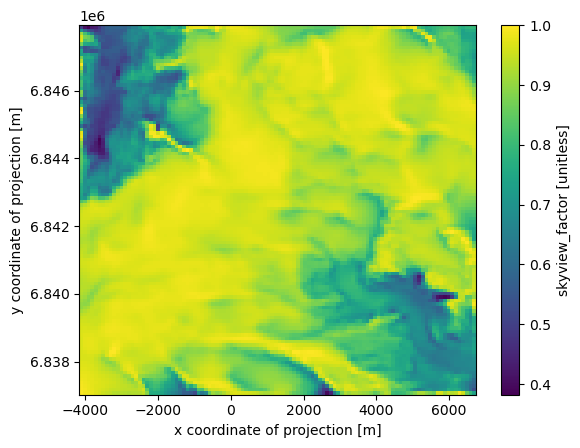

In [7]:
# Check skyview factor Nigardsbreen
gridded_data_dir = 'C:/Users/kasj/ML_MB_Norway/Data/oggm_data/per_glacier/train/RGI60-08.01126/gridded_data_svf.nc'

with xr.open_dataset(gridded_data_dir) as ds_grid:
    ds_grid.skyview_factor.plot()

In [8]:
# Add svf.nc to gridded_data.nc

def add_svf_to_gridded_data(svf_path, gridded_data_path, output_path):

    svf_ds = xr.open_dataset(svf_path)
    svf_var = svf_ds['__xarray_dataarray_variable__']
    
    # Rename the variable to "skyview_factor"
    svf_var = svf_var.rename("skyview_factor")

    gridded_ds = xr.open_dataset(gridded_data_path)

    svf_var = svf_var.assign_coords({
        "x": gridded_ds.coords["x"],
        "y": gridded_ds.coords["y"]
    })

    # Merge the svf variable into the gridded dataset
    combined_ds = gridded_ds.assign({"skyview_factor": svf_var})

    combined_ds.to_netcdf(output_path)

# Iterate through directories
def main(train_dir):
    for subdir in os.listdir(train_dir):
        subdir_path = os.path.join(train_dir, subdir)
        if os.path.isdir(subdir_path) and subdir.startswith('RGI60-08'):
            svf_path = os.path.join(subdir_path, 'svf.nc')
            gridded_data_path = os.path.join(subdir_path, 'gridded_data.nc')
            output_path = os.path.join(subdir_path, 'gridded_data_svf.nc')
            if os.path.exists(svf_path) and os.path.exists(gridded_data_path):
                print(f"Processing {subdir_path}")
                add_svf_to_gridded_data(svf_path, gridded_data_path, output_path)
            else:
                print(f"Missing svf.nc or gridded_data.nc in {subdir_path}")

if __name__ == '__main__':
    train_dir = 'C:/Users/kasj/ML_MB_Norway/Data/oggm_data/per_glacier/test'
    main(train_dir)

Processing C:/Users/kasj/ML_MB_Norway/Data/oggm_data/per_glacier/test\RGI60-08.00434
Processing C:/Users/kasj/ML_MB_Norway/Data/oggm_data/per_glacier/test\RGI60-08.00449
Processing C:/Users/kasj/ML_MB_Norway/Data/oggm_data/per_glacier/test\RGI60-08.01013
Processing C:/Users/kasj/ML_MB_Norway/Data/oggm_data/per_glacier/test\RGI60-08.01026
Processing C:/Users/kasj/ML_MB_Norway/Data/oggm_data/per_glacier/test\RGI60-08.01258
Processing C:/Users/kasj/ML_MB_Norway/Data/oggm_data/per_glacier/test\RGI60-08.01286
Processing C:/Users/kasj/ML_MB_Norway/Data/oggm_data/per_glacier/test\RGI60-08.01484
Processing C:/Users/kasj/ML_MB_Norway/Data/oggm_data/per_glacier/test\RGI60-08.01598
Processing C:/Users/kasj/ML_MB_Norway/Data/oggm_data/per_glacier/test\RGI60-08.02384
Processing C:/Users/kasj/ML_MB_Norway/Data/oggm_data/per_glacier/test\RGI60-08.02650
Processing C:/Users/kasj/ML_MB_Norway/Data/oggm_data/per_glacier/test\RGI60-08.02916
Processing C:/Users/kasj/ML_MB_Norway/Data/oggm_data/per_glacier/

## Add skyview to feature dataset by retrieving skyview factor using lat-lon

In [9]:
rgi_id = data['RGIID'].unique().tolist()

df_stake = data.copy()
voi = ['skyview_factor']

df_stake[voi] = np.nan
df_stake

,RGIID,GLIMSID,BREID,utm_zone,utm_east_approx,utm_north_approx,altitude_approx,location_description,location_id,stake_no,...,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep,altitude_climate,skyview_factor
0,RGI60-08.01258,G021737E70130N,54,34,529400.0,7780050.0,500.0,Nederst på bretunga,L10,L1012,...,0.005116,0.002688,0.002334,0.001159,0.003054,0.003977,0.004691,0.001449,341.227919,NaN
1,RGI60-08.01258,G021737E70130N,54,34,529400.0,7780050.0,500.0,Nederst på bretunga,L10,L1013,...,0.001831,0.004597,0.005634,0.002244,0.003412,0.000891,0.002129,0.004860,341.227919,NaN
2,RGI60-08.01258,G021737E70130N,54,34,529400.0,7780050.0,500.0,Nederst på bretunga,L10,L1013,...,0.004949,0.003286,0.003739,0.004709,0.005111,0.001253,0.002506,0.003256,341.227919,NaN
3,RGI60-08.01258,G021737E70130N,54,34,529400.0,7780050.0,500.0,Nederst på bretunga,L10,L1013,...,0.002495,0.002263,0.001256,0.002129,0.003969,0.003559,0.002119,0.002851,341.227919,NaN
4,RGI60-08.01258,G021737E70130N,54,34,529400.0,7780050.0,500.0,Nederst på bretunga,L10,L1016,...,0.003314,0.004417,0.002704,0.003991,0.001780,0.004257,0.005193,0.000710,341.227919,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4166,RGI60-08.02969,G006362E59989N,3141,32,351800.0,6647500.0,1080.0,Nederst på bretunga,B15,B1509,...,0.011964,0.007288,0.003555,0.005019,0.004730,0.007226,0.005739,0.011397,917.419759,NaN
4167,RGI60-08.02969,G006362E59989N,3141,32,351800.0,6647500.0,1080.0,Nederst på bretunga,B15,B1509,...,0.002572,0.000807,0.009360,0.006135,0.006760,0.005158,0.008218,0.005461,917.419759,NaN
4168,RGI60-08.02969,G006362E59989N,3141,32,351800.0,6647500.0,1080.0,Nederst på bretunga,B15,B1514,...,0.008543,0.010311,0.006261,0.008175,0.005974,0.006563,0.008015,0.003896,917.419759,NaN
4169,RGI60-08.02969,G006362E59989N,3141,32,351800.0,6647500.0,1080.0,Nederst på bretunga,B15,B1514,...,0.008916,0.003751,0.004573,0.004449,0.005235,0.008926,0.011151,0.009556,917.419759,NaN


In [10]:
# For each RGIID get attributes in nearest stake locations
for i in rgi_id:
    
    # Get latitutde and longtidue of stake locations for the given glacier.
    df_loc_rgiid = data.loc[data['RGIID']==i,('lat','lon')]
    
    # Get lat/lon coordinates of each stake:
    lat_stake = df_loc_rgiid.lat.values#.unique()
    lon_stake = df_loc_rgiid.lon.values#.unique()
    
    # Filepath to gridded data with svf
    filepath = 'C:/Users/kasj/ML_MB_Norway/Data/oggm_data/per_glacier/all/'+i+'/gridded_data_svf.nc'

    with xr.open_dataset(filepath) as ds:
        ds = ds.load()

    # Define target projection
    proj_string = ds.pyproj_srs
    target_proj = Proj(proj_string)

    # Define source projection (WGS84)
    source_proj = Proj(proj='latlong', datum='WGS84')

    # Convert stake coordinates to latitude and longitude
    x_stake, y_stake = transform(source_proj, target_proj, lon_stake, lat_stake)
    
    da_x_stake = xr.DataArray(x_stake, dims=['location'])
    da_y_stake = xr.DataArray(y_stake, dims=['location'])
    
    # Get svf at stake locations
    stake = ds.sel(x = da_x_stake, y = da_y_stake, method='nearest')
    
    stake_var = stake[voi]
    
    stake_var_df = stake_var.to_pandas()

    df_stake.loc[df_stake['RGIID']==i, voi] = stake_var_df[voi].values


C:\Users\kasj\AppData\Local\Temp\ipykernel_19844\453247101.py:25: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x_stake, y_stake = transform(source_proj, target_proj, lon_stake, lat_stake)
C:\Users\kasj\AppData\Local\Temp\ipykernel_19844\453247101.py:25: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x_stake, y_stake = transform(source_proj, target_proj, lon_stake, lat_stake)
C:\Users\kasj\AppData\Local\Temp\ipykernel_19844\453247101.py:25: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x_stake, y_stake = transform(source_proj, target_proj, lon_stake, lat_stake)
C:\Users\kasj\AppData\Local\Temp\ipykernel_19844\453247101.py:25: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/sta

In [11]:
df_stake

,RGIID,GLIMSID,BREID,utm_zone,utm_east_approx,utm_north_approx,altitude_approx,location_description,location_id,stake_no,...,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep,altitude_climate,skyview_factor
0,RGI60-08.01258,G021737E70130N,54,34,529400.0,7780050.0,500.0,Nederst på bretunga,L10,L1012,...,0.005116,0.002688,0.002334,0.001159,0.003054,0.003977,0.004691,0.001449,341.227919,0.778997
1,RGI60-08.01258,G021737E70130N,54,34,529400.0,7780050.0,500.0,Nederst på bretunga,L10,L1013,...,0.001831,0.004597,0.005634,0.002244,0.003412,0.000891,0.002129,0.004860,341.227919,0.798494
2,RGI60-08.01258,G021737E70130N,54,34,529400.0,7780050.0,500.0,Nederst på bretunga,L10,L1013,...,0.004949,0.003286,0.003739,0.004709,0.005111,0.001253,0.002506,0.003256,341.227919,0.803510
3,RGI60-08.01258,G021737E70130N,54,34,529400.0,7780050.0,500.0,Nederst på bretunga,L10,L1013,...,0.002495,0.002263,0.001256,0.002129,0.003969,0.003559,0.002119,0.002851,341.227919,0.803510
4,RGI60-08.01258,G021737E70130N,54,34,529400.0,7780050.0,500.0,Nederst på bretunga,L10,L1016,...,0.003314,0.004417,0.002704,0.003991,0.001780,0.004257,0.005193,0.000710,341.227919,0.817480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4166,RGI60-08.02969,G006362E59989N,3141,32,351800.0,6647500.0,1080.0,Nederst på bretunga,B15,B1509,...,0.011964,0.007288,0.003555,0.005019,0.004730,0.007226,0.005739,0.011397,917.419759,0.932281
4167,RGI60-08.02969,G006362E59989N,3141,32,351800.0,6647500.0,1080.0,Nederst på bretunga,B15,B1509,...,0.002572,0.000807,0.009360,0.006135,0.006760,0.005158,0.008218,0.005461,917.419759,0.932281
4168,RGI60-08.02969,G006362E59989N,3141,32,351800.0,6647500.0,1080.0,Nederst på bretunga,B15,B1514,...,0.008543,0.010311,0.006261,0.008175,0.005974,0.006563,0.008015,0.003896,917.419759,0.932281
4169,RGI60-08.02969,G006362E59989N,3141,32,351800.0,6647500.0,1080.0,Nederst på bretunga,B15,B1514,...,0.008916,0.003751,0.004573,0.004449,0.005235,0.008926,0.011151,0.009556,917.419759,0.932281


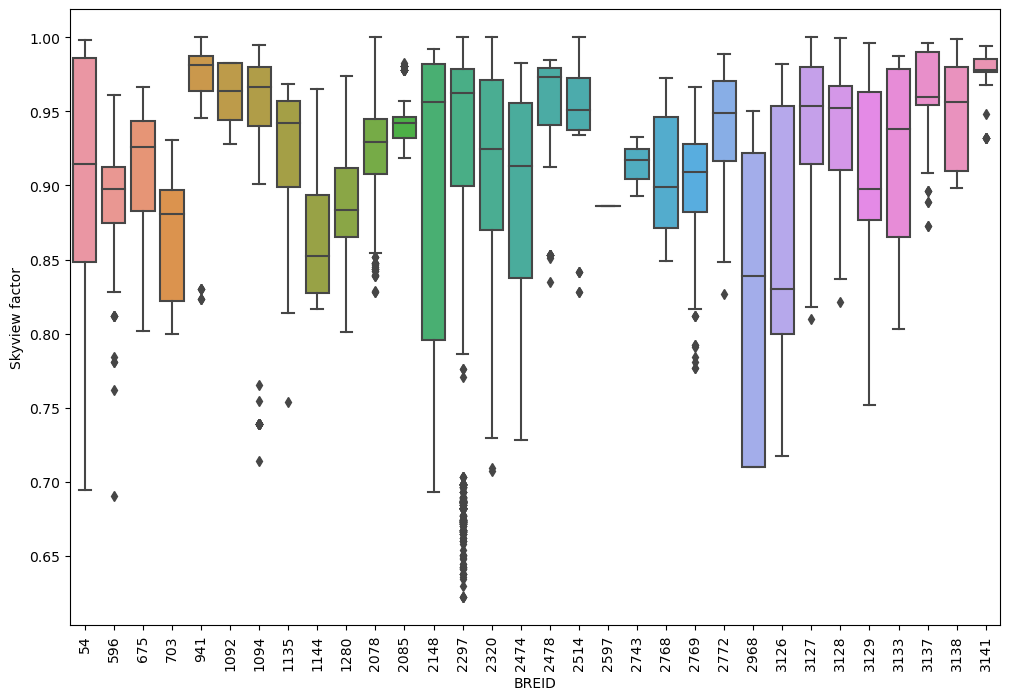

In [12]:
# Visualize distributions of skyview factor
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_stake, x='BREID', y='skyview_factor')
plt.xlabel('BREID')
plt.ylabel('Skyview factor')
plt.xticks(rotation=90)
plt.show()

In [14]:
# Save dataframe
filepath = 'Data/'
filename_svf = '2023-08-28_stake_mb_norway_cleaned_ids_latlon_wattributes_climate_svf.csv'

#df_stake.to_csv(filepath + filename_svf, index=False)  